In [28]:
import numpy as np
import pydot # graph visualization 
from IPython.display import HTML, SVG, display #svg: vector graphic
from pydrake.all import (AddMultibodyPlantSceneGraph, 
                        DiagramBuilder, 
                        FindResourceOrThrow, 
                        GenerateHtml,
                        InverseDynamicsController, 
                        MeshcatVisualizer, 
                        MeshcatVisualizerParams, 
                        MultibodyPlant, 
                        Parser, 
                        Simulator, 
                        StartMeshcat)
from manipulation import running_as_notebook


In [29]:
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7001


In [30]:
plant = MultibodyPlant(time_step=1e-4)
Parser(plant).AddModelFromFile(
    FindResourceOrThrow("drake/manipulation/models/iiwa_description/sdf/iiwa14_no_collision.sdf")
)
plant.WeldFrames(plant.world_frame(), plant.GetFrameByName("iiwa_link_0"))
plant.Finalize()

In [31]:
context = plant.CreateDefaultContext()
print(context)

# 14 variables: 
# 7 joint pos
# 7 joint velocity
# discrete ---> we set this by passing the timeStep at multibodyPlant

::_ Context
------------
Time: 0
States:
  1 discrete state groups with
     14 states
       0 0 0 0 0 0 0 0 0 0 0 0 0 0

Parameters:
  38 numeric parameter groups with
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     10 parameters
       nan nan nan nan nan nan nan nan nan nan
     10 parameters
            5   -0.1      0   0.07 0.0149 0.0269  0.016      0  0.007      0
     10 parameters
             5.76          0      -0.03       0.12  0.0210292  0.0201812 0.00303542          0          0     0.0036
     10 parameters
             6.35     0.0003      0.059      0.042  0.0100481 0.00655149 0.00521337  -1.77e-05  -1.26e-05  -0.002478
     10 parameters

In [32]:
plant.get_actuation_input_port().FixValue(context, np.zeros(7));

In [33]:
simulator = Simulator(plant, context)
simulator.AdvanceTo(5.0)
print(context)

::_ Context
------------
Time: 5
States:
  1 discrete state groups with
     14 states
         0.95159   -2.0958  0.176599  0.539263  -1.55272   1.21092  -3.03845   2.32679 0.0141064  -9.74473  -2.41131   8.22318   5.44376  0.849709

Parameters:
  38 numeric parameter groups with
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     10 parameters
       nan nan nan nan nan nan nan nan nan nan
     10 parameters
            5   -0.1      0   0.07 0.0149 0.0269  0.016      0  0.007      0
     10 parameters
             5.76          0      -0.03       0.12  0.0210292  0.0201812 0.00303542          0          0     0.0036
     10 parameters
             6.35     0

In [34]:
meshcat.Delete()
meshcat.DeleteAddedControls()
builder = DiagramBuilder()

plant, scene_graph = AddMultibodyPlantSceneGraph(builder,
                                                 time_step=1e-4)

Parser(plant, scene_graph).AddModelFromFile(
    FindResourceOrThrow("drake/manipulation/models/iiwa_description/sdf/iiwa14_no_collision.sdf")
)
plant.WeldFrames(plant.world_frame(), plant.GetFrameByName("iiwa_link_0"))
plant.Finalize()
visualizer = MeshcatVisualizer.AddToBuilder(builder, scene_graph, meshcat)
diagram = builder.Build()

In [35]:
# diagram aka a different system ---> still link port etc

context = diagram.CreateDefaultContext()
diagram.ForcedPublish(context)

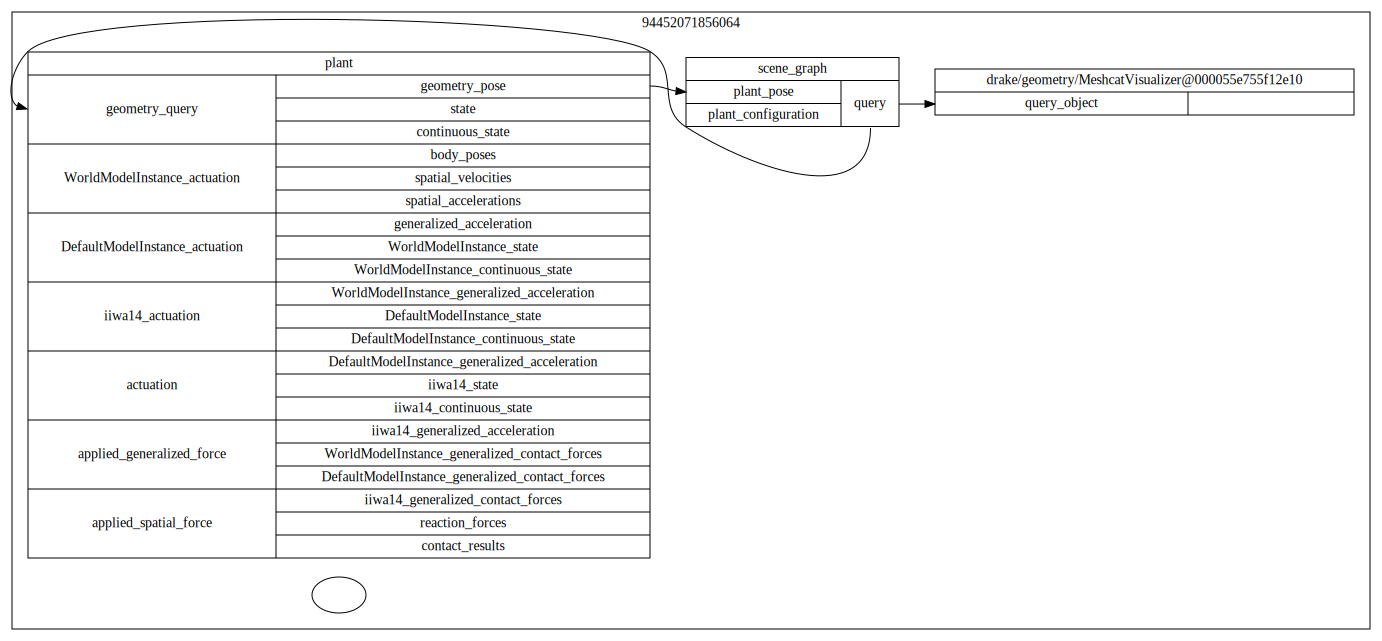

In [36]:
SVG(pydot.graph_from_dot_data(diagram.GetGraphvizString())[0].create_svg())

In [37]:
print(context) #from diagram

::_ Context (of a Diagram)
---------------------------
14 total discrete states in 1 groups
284 total numeric parameters in 38 groups
9 total abstract parameters

::_::plant Context
-------------------
Time: 0
States:
  1 discrete state groups with
     14 states
       0 0 0 0 0 0 0 0 0 0 0 0 0 0

Parameters:
  38 numeric parameter groups with
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     10 parameters
       nan nan nan nan nan nan nan nan nan nan
     10 parameters
            5   -0.1      0   0.07 0.0149 0.0269  0.016      0  0.007      0
     10 parameters
             5.76          0      -0.03       0.12  0.0210292  0.0201812 0.00303542          0

In [38]:
plant_context = plant.GetMyMutableContextFromRoot(context)
plant.SetPositions(plant_context, [-1.57, 0.1, 0, -1.2, 0, 1.6, 0])
plant.get_actuation_input_port().FixValue(plant_context, np.zeros(7))
print(context)

::_ Context (of a Diagram)
---------------------------
14 total discrete states in 1 groups
284 total numeric parameters in 38 groups
9 total abstract parameters

::_::plant Context
-------------------
Time: 0
States:
  1 discrete state groups with
     14 states
       -1.57   0.1     0  -1.2     0   1.6     0     0     0     0     0     0     0     0

Parameters:
  38 numeric parameter groups with
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     10 parameters
       nan nan nan nan nan nan nan nan nan nan
     10 parameters
            5   -0.1      0   0.07 0.0149 0.0269  0.016      0  0.007      0
     10 parameters
             5.76          0      -0.0

In [39]:
simulator = Simulator(diagram, context)
simulator.set_target_realtime_rate(1.0)
simulator.AdvanceTo(5.0 if running_as_notebook else 0.1)

In [40]:
# redo all, also record and play
def animation_demo(): 
    builder = DiagramBuilder()
    
    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=1e-4)
    Parser(plant, scene_graph).AddModelFromFile(
        FindResourceOrThrow("drake/manipulation/models/iiwa_description/sdf/iiwa14_no_collision.sdf")
    )
    # weld aka saldare --> set base frame as world frame
    plant.WeldFrames(plant.world_frame(), plant.GetFrameByName('iiwa_link_0'))
    plant.Finalize()
    
    visualizer = MeshcatVisualizer.AddToBuilder(builder, scene_graph, meshcat)
    
    
    diagram = builder.Build()
    context = diagram.CreateDefaultContext()
    plant_context = plant.GetMyMutableContextFromRoot(context)
    plant.get_actuation_input_port().FixValue(plant_context, np.zeros(7))
    
    simulator = Simulator(diagram, context)
    simulator.set_target_realtime_rate(1.0)
    
    visualizer.StartRecording()
    simulator.AdvanceTo(5.0 if running_as_notebook else 0.1)
    visualizer.StopRecording()
    visualizer.PublishRecording()

In [41]:
animation_demo()

# recreate robs, but adds controller

In [43]:
builder = DiagramBuilder()


#engine, data_struct for organize scene
plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=1e-4)

iiwa_model = Parser(plant, scene_graph).AddModelFromFile(
        FindResourceOrThrow("drake/manipulation/models/iiwa_description/sdf/iiwa14_no_collision.sdf")
)
# set world frame = robot base frame: 
plant.WeldFrames(plant.world_frame(), plant.GetFrameByName('iiwa_link_0'))

#compiles all the necessary "topological information"
plant.Finalize()

# meshcatVisualizer and wires sceneGraph
visualizer = MeshcatVisualizer.AddToBuilder(builder, scene_graph, meshcat)



# controller: 

kp = [100] * plant.num_positions()
ki = [1] * plant.num_positions()
kd = [20] * plant.num_positions()

iiwa_controller = builder.AddSystem(
    # add pid controller
    InverseDynamicsController(plant, kp, ki, kd, False)
)
iiwa_controller.set_name('iiwa_controller'); 
builder.Connect(plant.get_state_output_port(iiwa_model), 
               iiwa_controller.get_input_port_estimated_state())
builder.Connect(iiwa_controller.get_output_port_control(), 
               plant.get_actuation_input_port())

diagram = builder.Build()

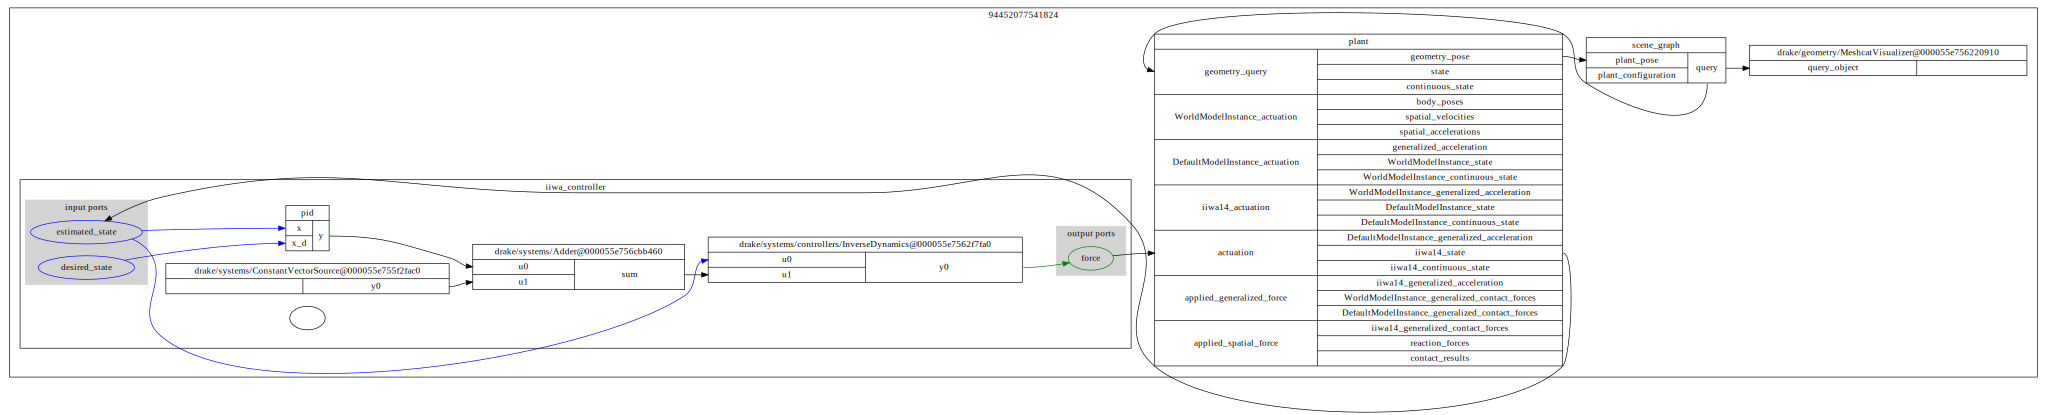

In [44]:
SVG(pydot.graph_from_dot_data(diagram.GetGraphvizString())[0].create_svg())

In [45]:
context = diagram.CreateDefaultContext()
plant_context = plant.GetMyMutableContextFromRoot(context)
q0 = np.array([-1.57, 0.1, 0, -1.2, 0, 1.6, 0])
x0 = np.hstack((q0, 0*q0))
plant.SetPositions(plant_context, q0)
iiwa_controller.GetInputPort('desired_state').FixValue(
    iiwa_controller.GetMyMutableContextFromRoot(context), x0)
print(context)

::_ Context (of a Diagram)
---------------------------
7 total continuous states
14 total discrete states in 1 groups
291 total numeric parameters in 39 groups
9 total abstract parameters

::_::plant Context
-------------------
Time: 0
States:
  1 discrete state groups with
     14 states
       -1.57   0.1     0  -1.2     0   1.6     0     0     0     0     0     0     0     0

Parameters:
  38 numeric parameter groups with
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     1 parameters
       0
     1 parameters
       1
     10 parameters
       nan nan nan nan nan nan nan nan nan nan
     10 parameters
            5   -0.1      0   0.07 0.0149 0.0269  0.016      0  0.007      0
     10 parameters
            

In [47]:
simulator = Simulator(diagram, context)
simulator.set_target_realtime_rate(1.0);
simulator.AdvanceTo(5.0 if running_as_notebook else 0.1);

RuntimeError: C++ object must be owned by pybind11 when attempting to release to C++